Consider the dataset ‘Adveristing.csv’. Find the correlation coefficient between the input
attributes newsp, Radio, Newspaper and Output Attribute Sales. Use least square estimation
method to find the line of regression b/w
1. TV and Sales
2. Radio and Sales
3. Newspaper and Sales

For all of the above options, also draw a scatter plot and line of regression. Also find the error in
each of the above.

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("./datasets/advertising.csv")
data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [115]:
print(data.corr()['Sales'])


TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


In [116]:
tv=np.array(data.T.iloc[0]).reshape(-1,1)
radio=np.array(data.T.iloc[1]).reshape(-1,1)
newsp=np.array(data.T.iloc[2]).reshape(-1,1)
sales=data.T.iloc[3]
tv.shape

(200, 1)

In [117]:
class OLE :
    def __init__(self):
        self.x_mean=None
        self.y_mean=None
        self.x_dev_sum_2=None
        self.tmp_xy_dev=None
        self.b0 =None
        self.b1 =None
    def fit(self,x,y):
        n=len(y)
        self.x_mean = sum(x)/n
        self.y_mean = sum(y)/n
        summ = 0
        for i in x :
            summ+= (i-self.x_mean)**2
        self.x_dev_sum_2 = summ
        summ=0
        for i in range(n):
            summ+= (y[i] -self.y_mean)*(x[i]-self.x_mean)
        self.tmp_xy_dev = summ
        self.b1 = self.tmp_xy_dev/self.x_dev_sum_2
        self.b0 = self.y_mean - self.b1*self.x_mean
    def predict(self,x):
        out = []
        for i in x :
            out.append(self.b0+self.b1*i)
        return np.array(out)
def rss(y,pred):
    n = len(y)
    if n!= len(pred):
        raise TypeError("Unequal Array Sizes")
    sms = 0
    for i in range(n):
        sms += (y[i]-pred[i])**2
    return sms
def my_mse(y,pred):
    n = len(y)
    return rss(y,pred)/n
    

Sales = [0.05546477] * TV + [6.97482149]


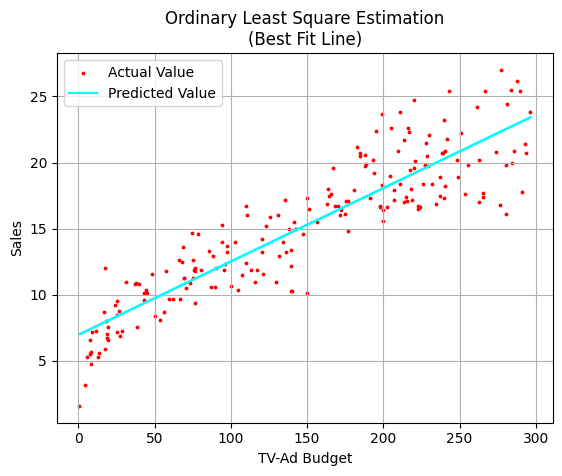

MSE= [5.2177439]


In [121]:
oletv = OLE()
oletv.fit(tv, sales)
coef_tv = oletv.b1
intercept_tv = oletv.b0
print(f"Sales = {coef_tv} * TV + {intercept_tv}")


plt.title("Ordinary Least Square Estimation\n(Best Fit Line)")
plt.scatter(tv,sales,c='red',label='Actual Value',s=3)
plt.plot(tv,oletv.predict(tv),c='cyan',label="Predicted Value")
plt.xlabel('TV-Ad Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
print("MSE=",my_mse(sales,oletv.predict(tv)))

Sales = [0.12443166] * Radio + [12.23572197]


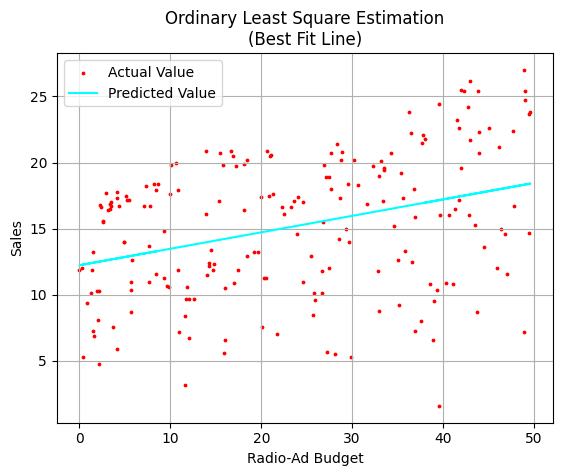

MSE= [24.38404947]


In [122]:
oleradio = OLE()
oleradio.fit(radio, sales)
coef_radio = oleradio.b1
intercept_radio = oleradio.b0
print(f"Sales = {coef_radio} * Radio + {intercept_radio}")


plt.title("Ordinary Least Square Estimation\n(Best Fit Line)")
plt.scatter(radio,sales,c='red',label='Actual Value',s=3)
plt.plot(radio,oleradio.predict(radio),c='cyan',label="Predicted Value")
plt.xlabel('Radio-Ad Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
print("MSE=",my_mse(sales,oleradio.predict(radio)))

Sales = [0.05546477] * Newspaper + [6.97482149]


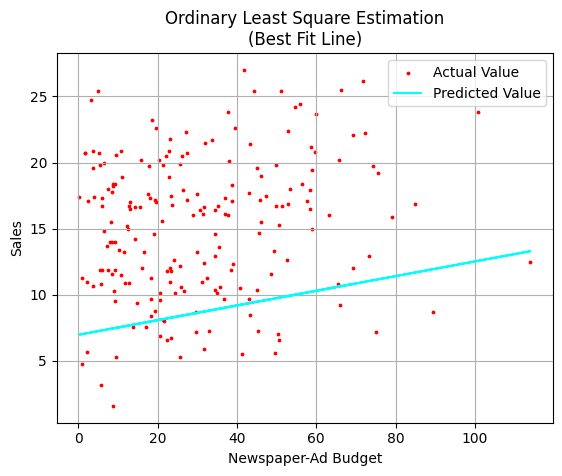

MSE= [68.97005392]


In [123]:
olenewsp = OLE()
olenewsp.fit(tv, sales)
coef_newsp = olenewsp.b1
intercept_newsp = olenewsp.b0
print(f"Sales = {coef_newsp} * Newspaper + {intercept_newsp}")


plt.title("Ordinary Least Square Estimation\n(Best Fit Line)")
plt.scatter(newsp,sales,c='red',label='Actual Value',s=3)
plt.plot(newsp,olenewsp.predict(newsp),c='cyan',label="Predicted Value")
plt.xlabel('Newspaper-Ad Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
print("MSE=",my_mse(sales,olenewsp.predict(newsp)))